In [23]:
#Importing header files
import pandas as pd
import scipy.stats as stats
import math
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.weightstats import ztest
from statsmodels.stats.weightstats import ztest
from scipy.stats import chi2_contingency
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
#Sample_Size
sample_size=2000

#Z_Critical Score
z_critical = stats.norm.ppf(q = 0.95)  

In [4]:
critical_value = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                                df = 6)   # Df = number of variable categories(in purpose) - 1

In [5]:
#Reading file
data=pd.read_csv(r"C:\Users\vaibh\Desktop\Python DS\Sprint 5_Advanced Statistics\file (4).csv")
data

,customer.id,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,pub.rec,inq.last.6mths,delinq.2yrs,paid.back.loan
0,LA001,Yes,debt_consolidation,11.89%,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,Less than 5,No,Yes
1,LA002,Yes,credit_card,10.71%,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,Less than 5,No,Yes
2,LA003,Yes,debt_consolidation,13.57%,366.86,10.373491,11.63,682,4710.000000,3511,25.6,0,Less than 5,No,Yes
3,LA004,Yes,debt_consolidation,10.08%,162.34,11.350407,8.10,712,2699.958333,33667,73.2,0,Less than 5,No,Yes
4,LA005,Yes,credit_card,14.26%,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,Less than 5,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,LA009574,No,all_other,14.61%,344.76,12.180755,10.39,672,10474.000000,215372,82.1,0,Less than 5,No,No
9574,LA009575,No,all_other,12.53%,257.70,11.141862,0.21,722,4380.000000,184,1.1,0,Less than 10,No,No
9575,LA009576,No,debt_consolidation,10.71%,97.81,10.596635,13.09,687,3450.041667,10036,82.9,0,Less than 10,No,No
9576,LA009577,No,home_improvement,16.00%,351.58,10.819778,19.18,692,1800.000000,0,3.2,0,Less than 10,No,No


In [6]:
#TASK 1: Confidence Interval
#Sampling the dataframe
data_sample= data.sample(n=sample_size, random_state=0)
data_sample

,customer.id,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,pub.rec,inq.last.6mths,delinq.2yrs,paid.back.loan
3343,LA003344,Yes,all_other,11.89%,49.75,10.829729,16.87,687,2314.958333,962,64.1,0,Less than 5,No,Yes
9,LA0010,Yes,debt_consolidation,12.21%,84.12,10.203592,10.00,707,2730.041667,5630,23.0,0,Less than 5,No,Yes
1741,LA001742,Yes,debt_consolidation,16.95%,712.54,11.918391,13.61,672,4830.041667,16473,94.1,0,Less than 5,Yes,Yes
5160,LA005161,Yes,debt_consolidation,17.39%,286.78,11.189962,19.59,667,7020.000000,19892,67.0,1,Less than 5,No,Yes
7760,LA007761,No,credit_card,13.12%,202.51,9.392662,4.40,657,898.958333,5251,49.3,0,Less than 10,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3831,LA003832,Yes,all_other,9.63%,205.41,10.668955,21.01,727,3720.000000,2210,11.9,0,Less than 5,No,Yes
6864,LA006865,Yes,major_purchase,11.83%,165.67,11.002100,8.92,707,2501.000000,7990,34.3,0,Less than 5,No,Yes
1940,LA001941,Yes,credit_card,11.89%,169.14,10.239960,16.11,697,4080.000000,20722,52.1,0,Less than 5,No,Yes
2359,LA002360,Yes,debt_consolidation,13.79%,340.76,11.168631,24.91,692,8850.000000,6344,32.4,0,Less than 5,Yes,Yes


In [7]:
#Finding the mean of the sample
sample_mean= data_sample['installment'].mean()
print(sample_mean)

317.61096499999996


In [8]:
# finding the standard deviation of the population
population_std= data['installment'].std()
print(population_std)

207.07130149985852


In [9]:
# finding the margin of error
margin_of_error= z_critical*population_std/math.sqrt(sample_size)
print(margin_of_error)

7.616091834793877


In [10]:
# finding the confidence interval
confidence_interval= [sample_mean-margin_of_error, sample_mean+margin_of_error]
print(confidence_interval)

[309.9948731652061, 325.2270568347938]


In [11]:
# finding the true mean
true_mean= data['installment'].mean()
print(true_mean)

319.08941323867265


In [12]:
#TASK 3: Small Business Interests
purpose_col = data[['int.rate','purpose']]
purpose_col
purpose_col['int.rate'] = purpose_col['int.rate'].str.rstrip('%').astype(float)
purpose_col['int.rate']

0       11.89
1       10.71
2       13.57
3       10.08
4       14.26
        ...  
9573    14.61
9574    12.53
9575    10.71
9576    16.00
9577    13.92
Name: int.rate, Length: 9578, dtype: float64

In [13]:
small_business_col= purpose_col[purpose_col['purpose']== 'small_business']
small_business_col

,int.rate,purpose
13,7.14,small_business
42,8.70,small_business
51,10.28,small_business
52,10.59,small_business
55,10.59,small_business
...,...,...
9496,16.35,small_business
9535,14.96,small_business
9536,13.48,small_business
9539,15.33,small_business


In [14]:
z_statistic_1, p_value_1 = ztest(small_business_col["int.rate"], value= 12, alternative= 'larger')
print("z_statistic_1 = ",z_statistic_1)
print("p_value_1 = ",p_value_1)

z_statistic_1 =  14.427114462533103
p_value_1 =  1.7469782090670567e-47


In [15]:
#TASK 4: Installment vs Loan Defaulting
loan_payment_cols=data[['installment','paid.back.loan']]
loan_payment_cols

,installment,paid.back.loan
0,829.10,Yes
1,228.22,Yes
2,366.86,Yes
3,162.34,Yes
4,102.92,Yes
...,...,...
9573,344.76,No
9574,257.70,No
9575,97.81,No
9576,351.58,No


In [16]:
loan_paid = loan_payment_cols[loan_payment_cols['paid.back.loan'] == 'Yes']
loan_defaulters= loan_payment_cols[loan_payment_cols['paid.back.loan'] == 'No']
x1= loan_defaulters['installment']
x2= loan_paid['installment']
print(loan_paid)

      installment paid.back.loan
0          829.10            Yes
1          228.22            Yes
2          366.86            Yes
3          162.34            Yes
4          102.92            Yes
...           ...            ...
9561       115.74            Yes
9562       508.87            Yes
9564       511.56            Yes
9567       101.24            Yes
9568        37.06            Yes

[8045 rows x 2 columns]


In [17]:
print(loan_defaulters)

      installment paid.back.loan
6          194.02             No
7          131.22             No
57         678.08             No
65          32.55             No
73         225.37             No
...           ...            ...
9573       344.76             No
9574       257.70             No
9575        97.81             No
9576       351.58             No
9577       853.43             No

[1533 rows x 2 columns]


In [18]:
z_statistic_2, p_value_2 = ztest(x1,x2, value=0)
print("z_statistic_2 = ",z_statistic_2)
print("p_value_2 = ",p_value_2)

z_statistic_2 =  4.894575287952092
p_value_2 =  9.85182562491764e-07


In [19]:
#TASK 5: Purpose vs Loan Defaulting

# Value counts of different purposes when customers have paid back loan and when they haven't
observed= pd.crosstab(data['purpose'],data['paid.back.loan'])
observed

paid.back.loan,No,Yes
purpose,,
all_other,387,1944
credit_card,146,1116
debt_consolidation,603,3354
educational,69,274
home_improvement,107,522
major_purchase,49,388
small_business,172,447


In [20]:
# conduct the chi-square test with the above frequency table
chi2, p, dof, ex = stats.chi2_contingency(observed)

print("Chi-square statistic = ",chi2)
print("p-value = ",p)

Chi-square statistic =  96.9846958906326
p-value =  1.0672453117980497e-18


In [21]:
# Compare chi2 with critical_value(given)
if(chi2>critical_value):
    print('Reject the null hypothesis')
else:
    print('Accept the null hypothesis')

Reject the null hypothesis


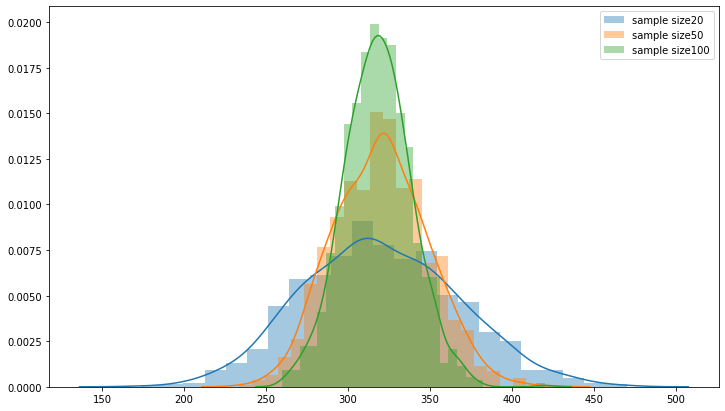

In [24]:
# TASK 2: Let's now find out if Central Limit Theorem holds for installment column
sample_sizes= np.array([20,50,100])
plt.figure(figsize= [12,7])
for sample_size in sample_sizes:
    lst=[]
    for i in range(1000):
        data_new= data.sample(n=sample_size)
        lst.append(data_new['installment'].mean())
    sns.distplot(lst, hist= True, label= 'sample size{}'.format(sample_size))
    plt.legend()